In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы
### 1.1 Скачать данные по ссылке

In [3]:
df = pd.read_csv('./kc_house_data.csv')

In [4]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### 1.2 Изучите стоимости недвижимости

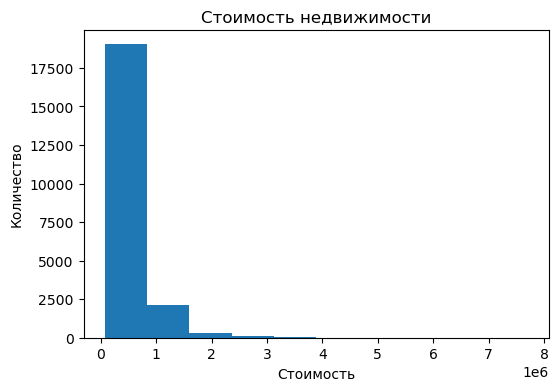

In [5]:
plt.figure(figsize = (6,4))
plt.hist(df['price'], bins = 10)
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.title('Стоимость недвижимости');

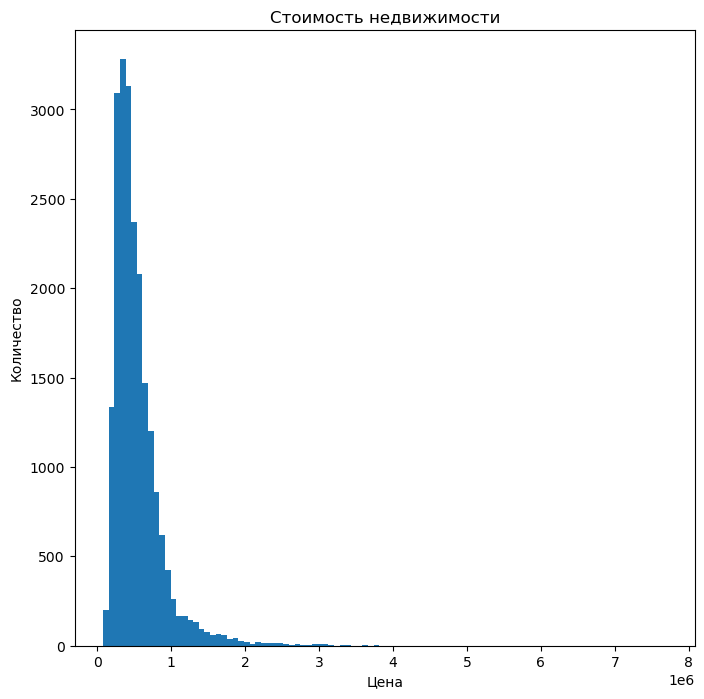

In [6]:
plt.figure(figsize=(8,8))

plt.hist(df['price'], bins=100)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

_Вывод:_

1. Распределение цены на дома стоимостью до 2 000 близкое к нормальному. 
2. Больше всего домов стоимостью от 400 000 до 500 000.
3. Количество домов, стоимостью свяше 500 000 снижается пропорционально цене.

### 1.3 Изучите распределение квадратуры жилой

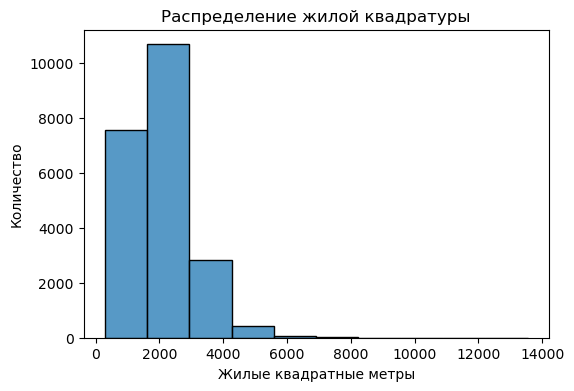

In [7]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 10)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

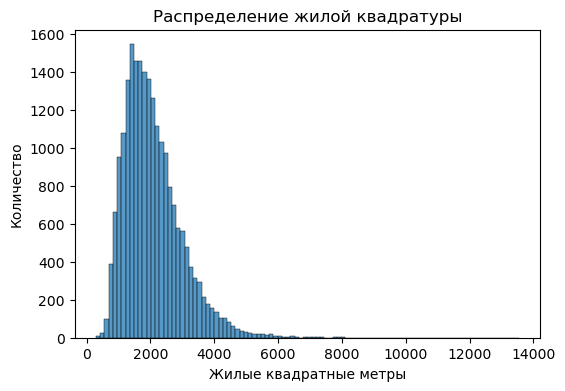

In [8]:
plt.figure(figsize = (6,4))
sns.histplot(df['sqft_living'], bins = 100)
plt.xlabel('Жилые квадратные метры')
plt.ylabel('Количество')
plt.title('Распределение жилой квадратуры');

_Вывод:_

Распределение жилой площади близкое к нормальному (со смещением (ассиметрией) вправо). Причина смещения - наличие выбросов (домов с площадью более 6 000 кв.м.). 


### 1.4. Изучите распределение года постройки

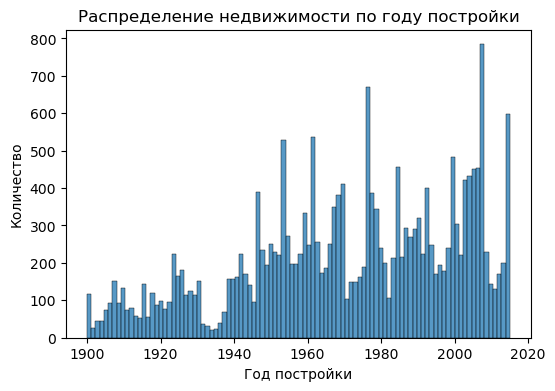

In [9]:
plt.figure(figsize = (6,4))
sns.histplot(df['yr_built'], bins = 100)
plt.xlabel('Год постройки')
plt.ylabel('Количество')
plt.title('Распределение недвижимости по году постройки');

_Вывод:_

1. Распределение недвижимости в зависимости от года постройки не соответствует нормальному. 
2. Большая часть домов построена  после 1935 года. 
3. Наблюдаются "пиковые" года, когда строилось значительно больше домов, чем в предыдущие 4-5 лет. 

# Задача 2
### 2.1. Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

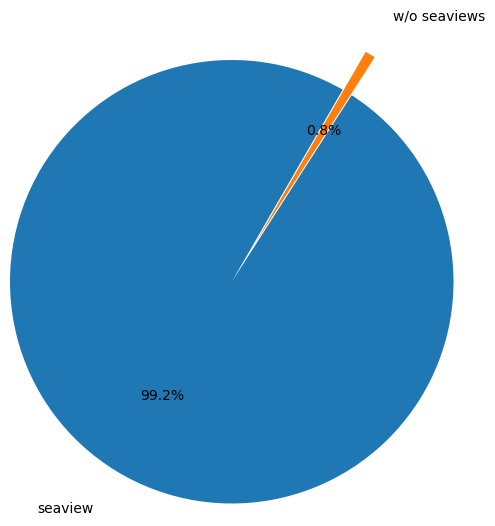

In [10]:
data_view = df['waterfront'].value_counts()
val = data_view.values
plt.pie(val,labels=['seaview', 'w/o seaviews'],explode=[0,0.3],
        radius = 1.5, startangle=60,
        labeldistance=1.2, autopct='%.1f%%');

_Вывод:_

Всего лишь 0,8% всей недвижимости, которая продается, с видом на набережную

### 2.2. Изучите распределение этажей домов

In [11]:
df.floors.max(), df.floors.min()

(3.5, 1.0)

In [12]:
data2 = df['floors'].value_counts(normalize=True)*100
data2

1.0    49.414704
2.0    38.129829
1.5     8.837274
3.0     2.836256
2.5     0.744922
3.5     0.037015
Name: floors, dtype: float64

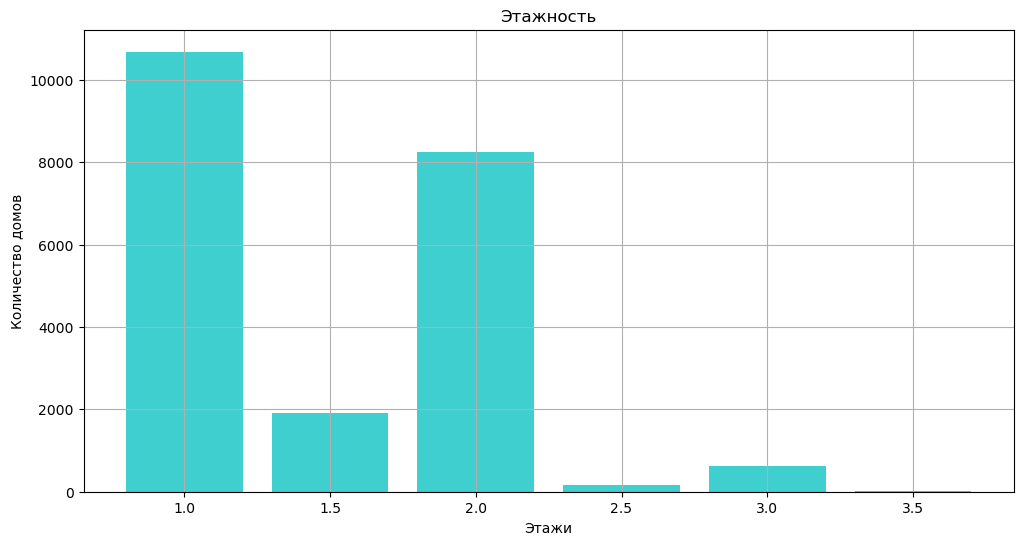

In [13]:
data_floor = df['floors'].value_counts()
f_val = data_floor.values
f_ind = data_floor.index
plt.figure(figsize=(12, 6))
plt.bar(f_ind,f_val, width=0.4, facecolor='c', alpha=0.75)
plt.title('Этажность')
plt.xlabel('Этажи')
plt.ylabel('Количество домов')
plt.grid(True)
plt.show()

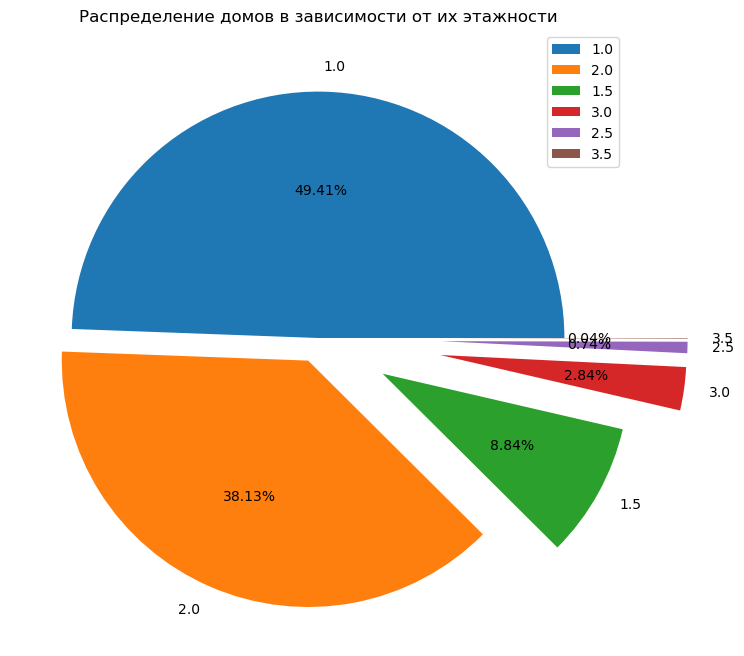

In [14]:
plt.figure(figsize=(10,8))
explode = [0.0, 0.1, 0.3, 0.5, 0.5, 0.5]
plt.pie(data2.values, autopct='%1.2f%%', labels=data2.index, explode=explode)
plt.legend(data2.index)
plt.title('Распределение домов в зависимости от их этажности');

Вывод:

1. Большая часть домов - это дома с одним или двумя этажами.
2. Одноэтажные дома лидируют по продаже недвижимости (49,4%).
3. Минимальная доля приходится на 2,5-этажные и 3,5-этажные дома (0,74%, 0,04% соответственно)

### 2.3. Изучите распределение состояния домов

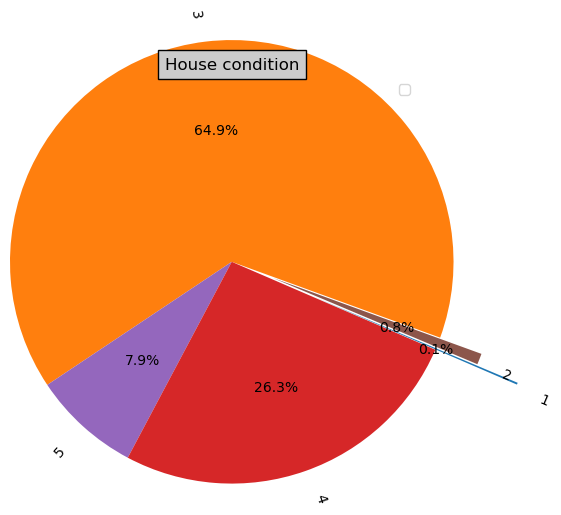

In [15]:
data_cond = df['condition'].value_counts(sort=False)
data_cond
cond_val= data_cond.values
cond_ind = data_cond.index
cond_explode = [0,0,0,0.6,0.3]
colors = ["#ff7f0e", "#9467bd", "#d62728","#1f77b4", "#8c564b"]
plt.legend(cond_ind)
plt.pie(cond_val, labels=cond_ind, radius = 1.5,
        startangle=-20, colors=colors,
        rotatelabels=True, explode = cond_explode,
        labeldistance=1.1, autopct='%.1f%%')
plt.title("House condition", bbox={'facecolor':'0.8', 'pad':5})
plt.show;

_Вывод:_

Менее 1% домов в плохом состоянии (1), около 2/3 домов в среднем (3) состоянии

# Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [16]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12360\4194942596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


id  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
id             1.0    0.0       0.0        0.0          0.0       0.0     0.0   
price          0.0    1.0       0.3        0.5          0.7       0.0     0.3   
bedrooms       0.0    0.3       1.0        0.5          0.6       0.0     0.0   
bathrooms      0.0    0.5       0.5        1.0          0.8       0.0     0.5   
sqft_living    0.0    0.7       0.6        0.8          1.0       0.0     0.4   
sqft_lot       0.0    0.0       0.0        0.0          0.0       1.0     0.0   
floors         0.0    0.3       0.0        0.5          0.4       0.0     1.0   
waterfront     0.0    0.3       0.0        0.0          0.0       0.0     0.0   
view           0.0    0.4       0.0        0.0          0.3       0.0     0.0   
condition      0.0    0.0       0.0        0.0          0.0       0.0    -0.3   
grade          0.0    0.7       0.4        0.7          0.8       0.0     0.5   
sqft_above     0.0    0.6       0.5        0.7          0.9       0.0     0.5   
sqft_basement  0.0    0.3       0.3        0.3          0.4       0.0     0.0   
yr_built       0.0    0.0       0.0        0.5          0.3       0.0     0.5   
yr_renovated   0.0    0.0       0.0        0.0          0.0       0.0     0.0   
zipcode        0.0    0.0       0.0        0.0          0.0       0.0     0.0   
lat            0.0    0.3       0.0        0.0          0.0       0.0     0.0   
long           0.0    0.0       0.0        0.0          0.0       0.0     0.0   
sqft_living15  0.0    0.6       0.4        0.6          0.8       0.0     0.3   
sqft_lot15     0.0    0.0       0.0        0.0          0.0       0.7     0.0   

               waterfront  view  condition  grade  sqft_above  sqft_basement  \
id                    0.0   0.0        0.0    0.0         0.0            0.0   
price                 0.3   0.4        0.0    0.7         0.6            0.3   
bedrooms              0.0   0.0        0.0    0.4         0.5            0.3   
bathrooms             0.0   0.0        0.0    0.7         0.7            0.3   
sqft_living           0.0   0.3        0.0    0.8         0.9            0.4   
sqft_lot              0.0   0.0        0.0    0.0         0.0            0.0   
floors                0.0   0.0       -0.3    0.5         0.5            0.0   
waterfront            1.0   0.4        0.0    0.0         0.0            0.0   
view                  0.4   1.0        0.0    0.3         0.0            0.3   
condition             0.0   0.0        1.0    0.0         0.0            0.0   
grade                 0.0   0.3        0.0    1.0         0.8            0.0   
sqft_above            0.0   0.0        0.0    0.8         1.0            0.0   
sqft_basement         0.0   0.3        0.0    0.0         0.0            1.0   
yr_built              0.0   0.0       -0.4    0.4         0.4            0.0   
yr_renovated          0.0   0.0        0.0    0.0         0.0            0.0   
zipcode               0.0   0.0        0.0    0.0        -0.3            0.0   
lat                   0.0   0.0        0.0    0.0         0.0            0.0   
long                  0.0   0.0        0.0    0.0         0.3            0.0   
sqft_living15         0.0   0.3        0.0    0.7         0.7            0.0   
sqft_lot15            0.0   0.0        0.0    0.0         0.0            0.0   

               yr_built  yr_renovated  zipcode  lat  long  sqft_living15  \
id                  0.0           0.0      0.0  0.0   0.0            0.0   
price               0.0           0.0      0.0  0.3   0.0            0.6   
bedrooms            0.0           0.0      0.0  0.0   0.0            0.4   
bathrooms           0.5           0.0      0.0  0.0   0.0            0.6   
sqft_living         0.3           0.0      0.0  0.0   0.0            0.8   
sqft_lot            0.0           0.0      0.0  0.0   0.0            0.0   
floors              0.5           0.0      0.0  0.0   0.0            0.3   
waterfront          0.0  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12360\2047642882.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(df.corr())


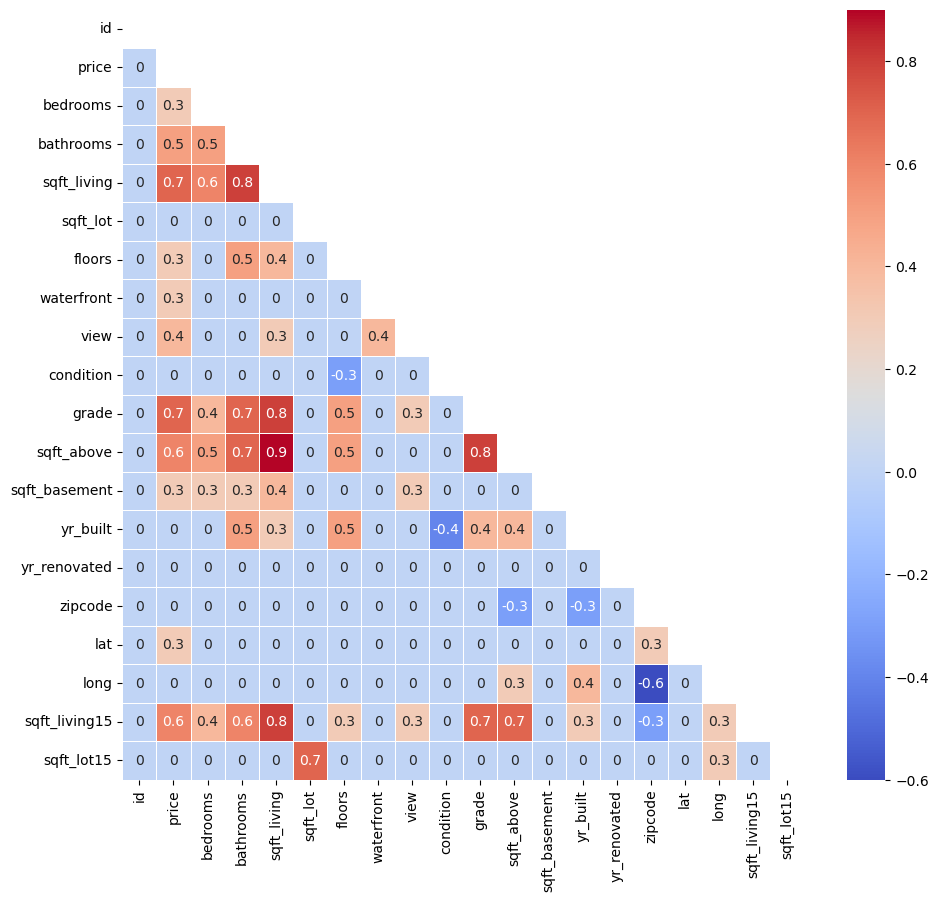

In [17]:
plt.figure(figsize=(11, 10))
upp_mat = np.triu(df.corr())
sns.heatmap(corr_matrix, annot=True, linewidths=.5,
            cmap='coolwarm', mask= upp_mat);

_Выводы:_
1. Наиболее сильная взаимосвязь (более 0,6) с ценой недвижимости выявлена у следующих факторов:
- sqft_living - Кв. метры жилые
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_living15 - Кв. метры жилой площади у 15 соседей
2. Прямопропорционально связаны с ценой недвижимости и такие характеристики, как:
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комна
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- lat - Широта

In [ ]:
sns.jointplot(data=df, x='sqft_living15', y='price', kind='reg', height=12, ratio=4);


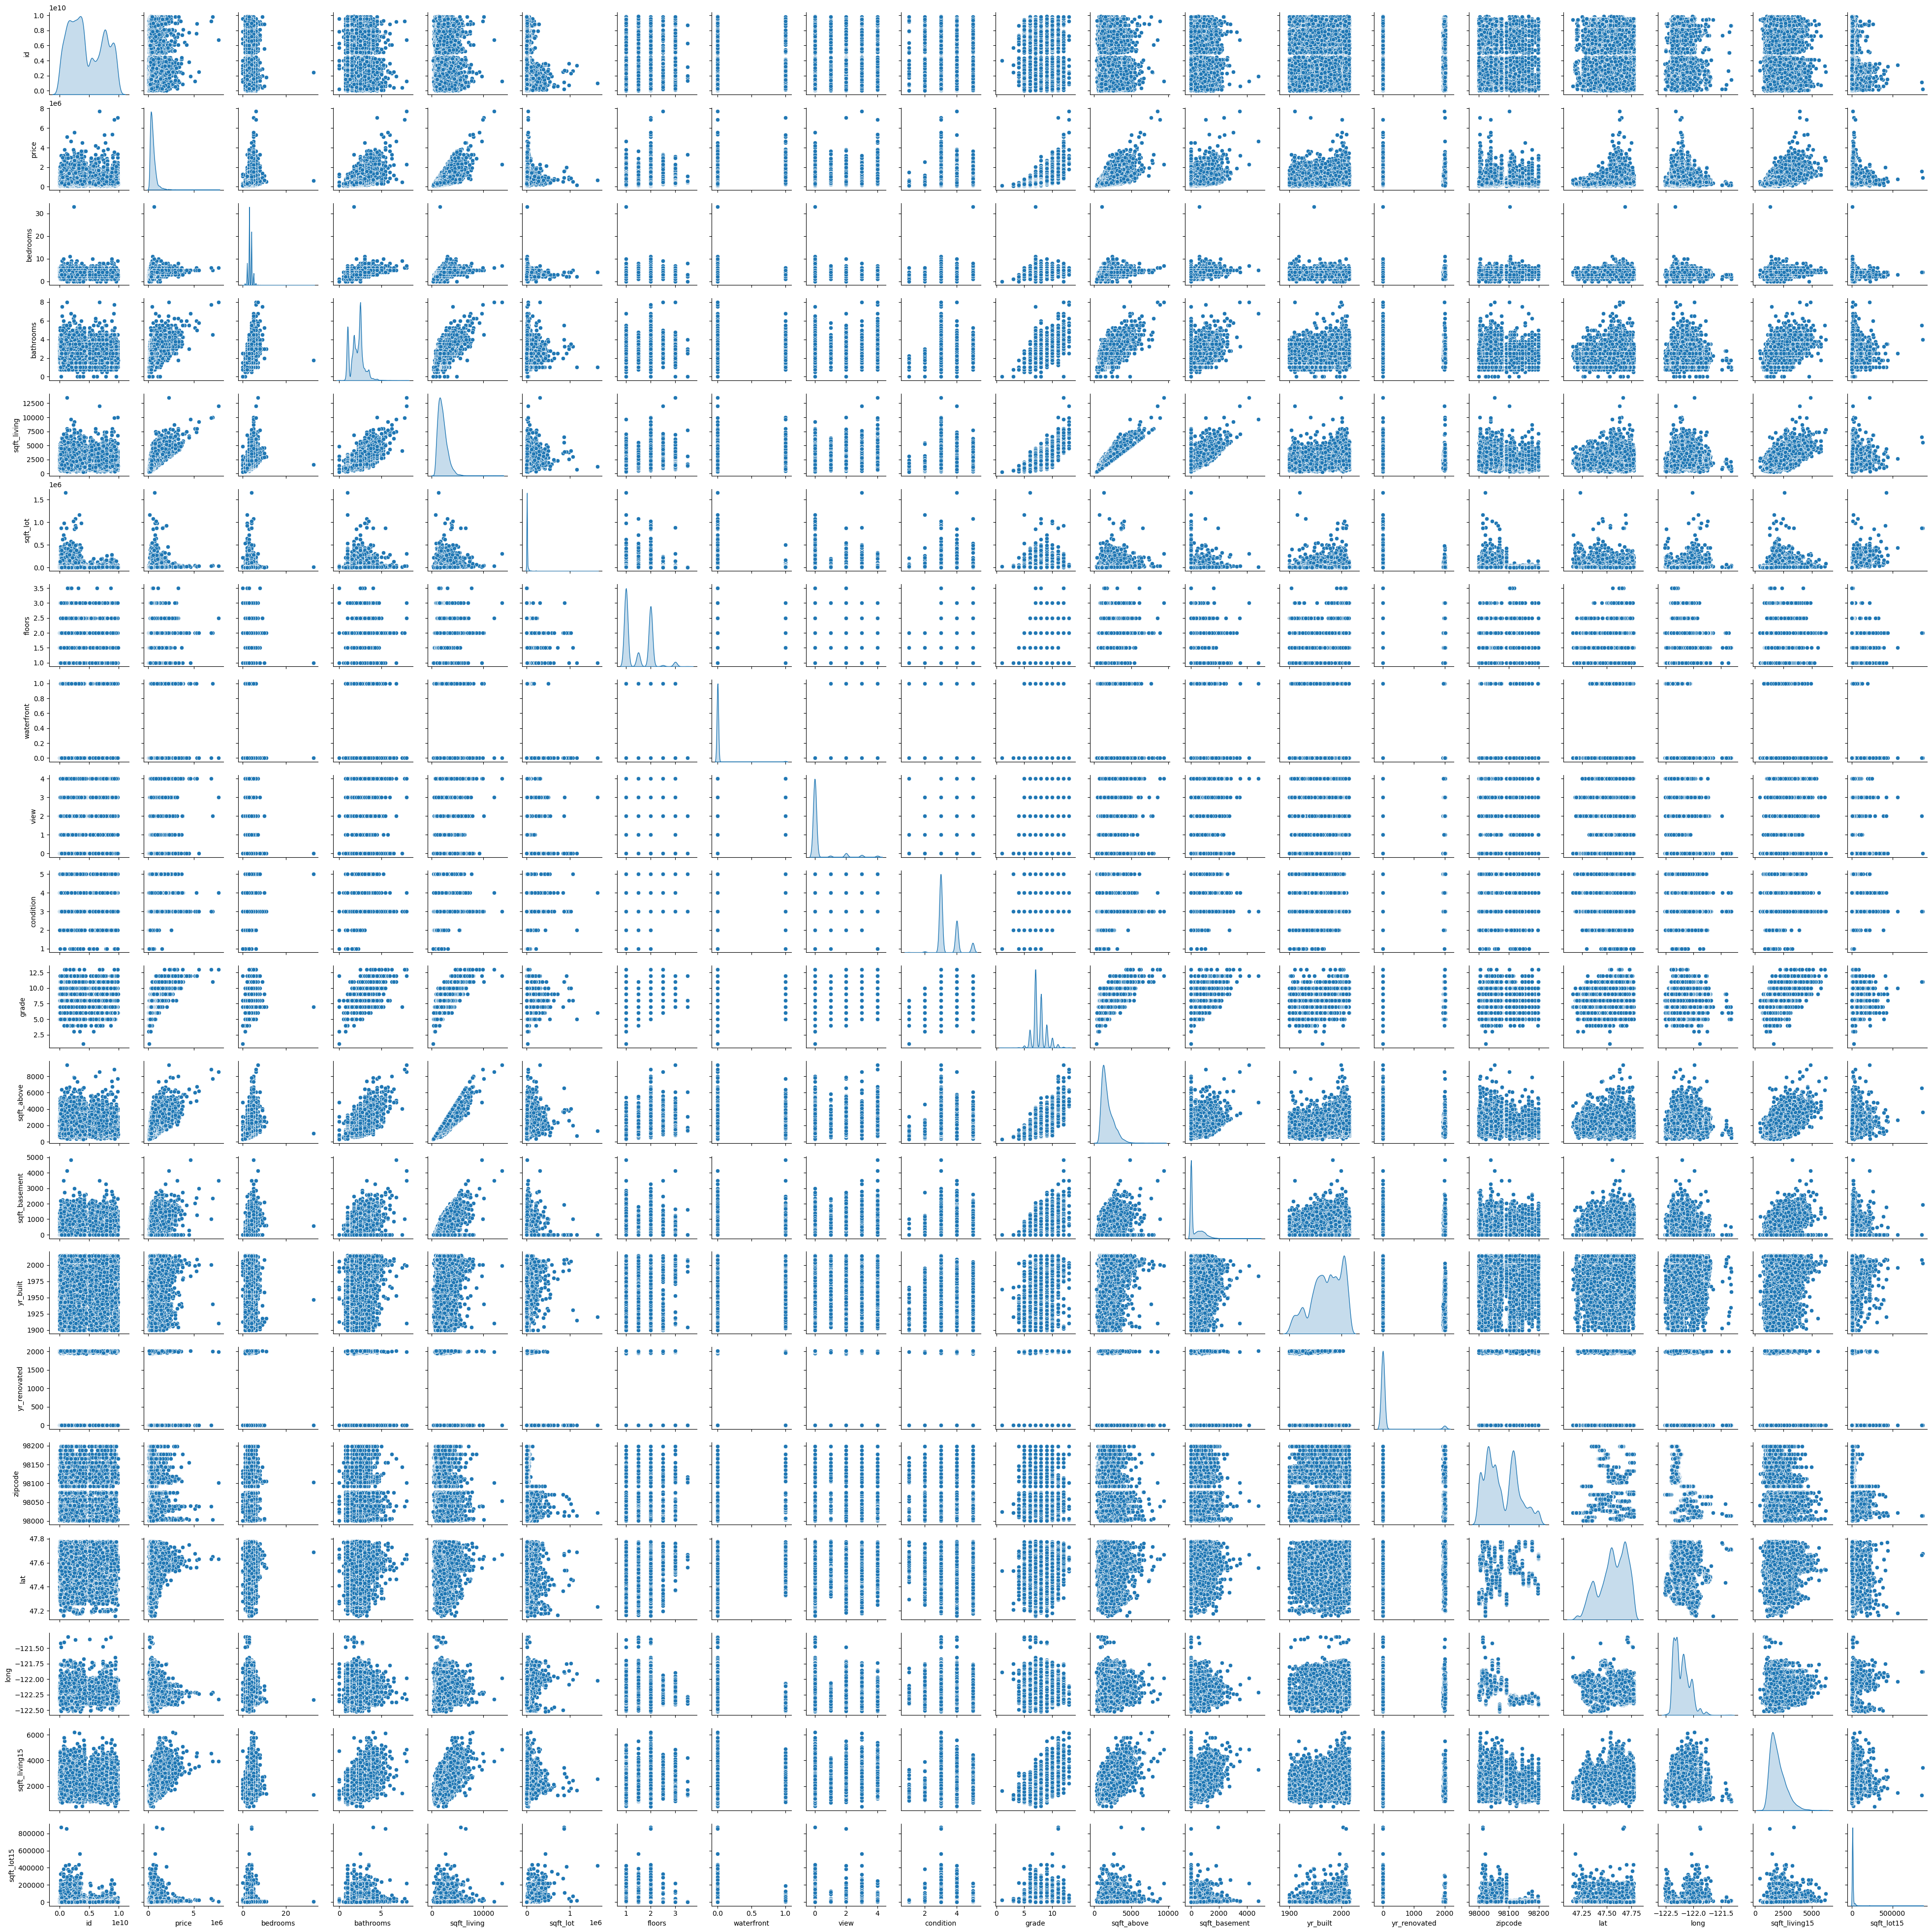

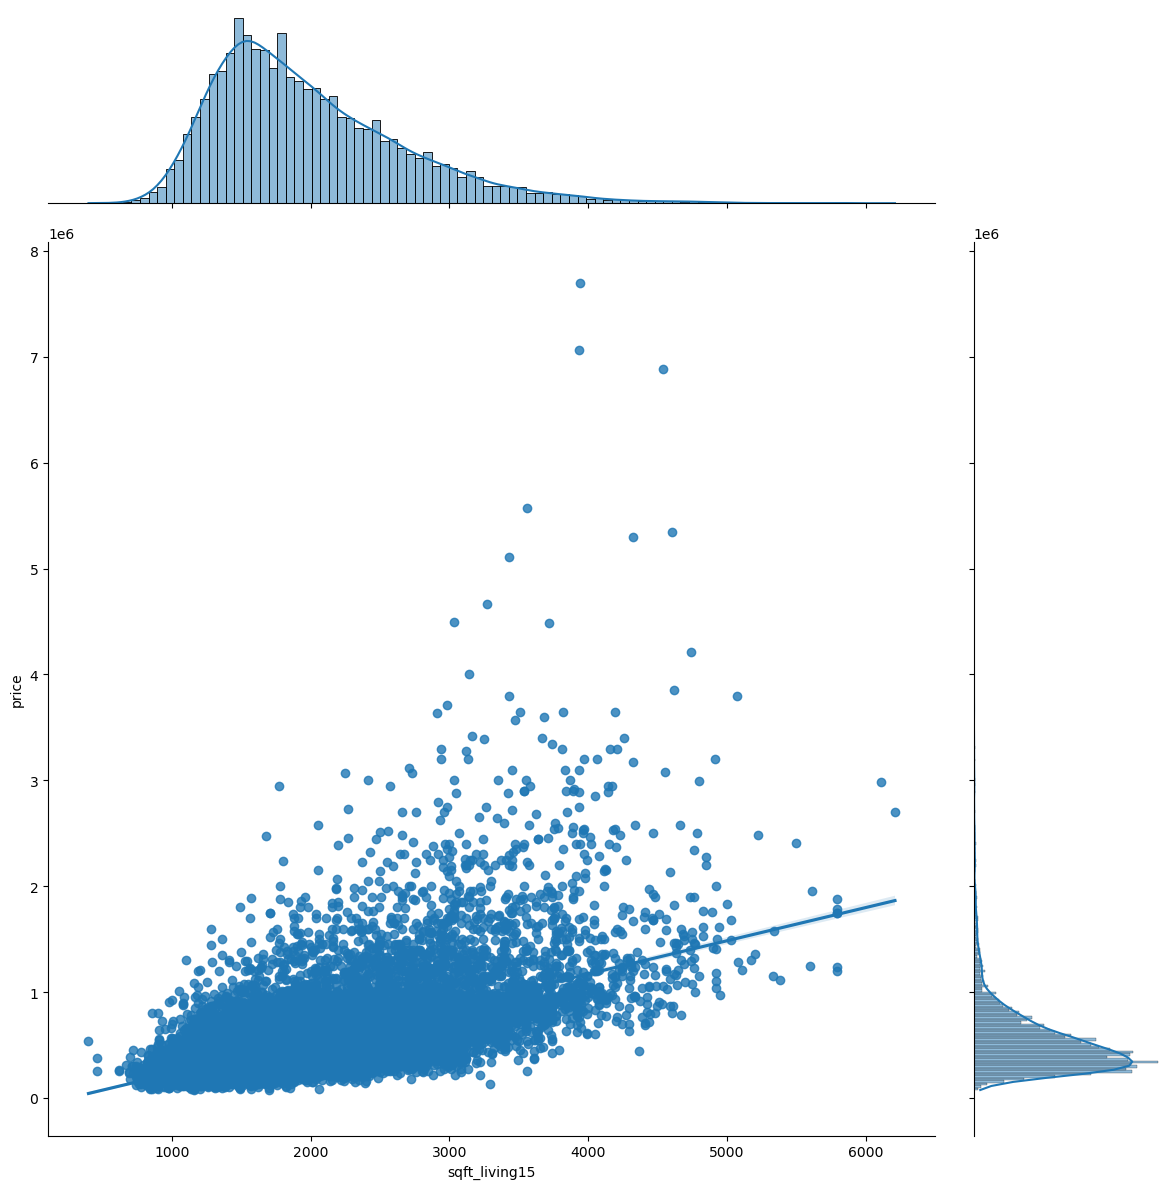

In [32]:
sns.jointplot(data=df, x="sqft_living15", y="price", kind="reg", height=12, ratio=4); 


_Вывод:_
чем больше жилая площадь у 15 соседей, тем выше цена дома.

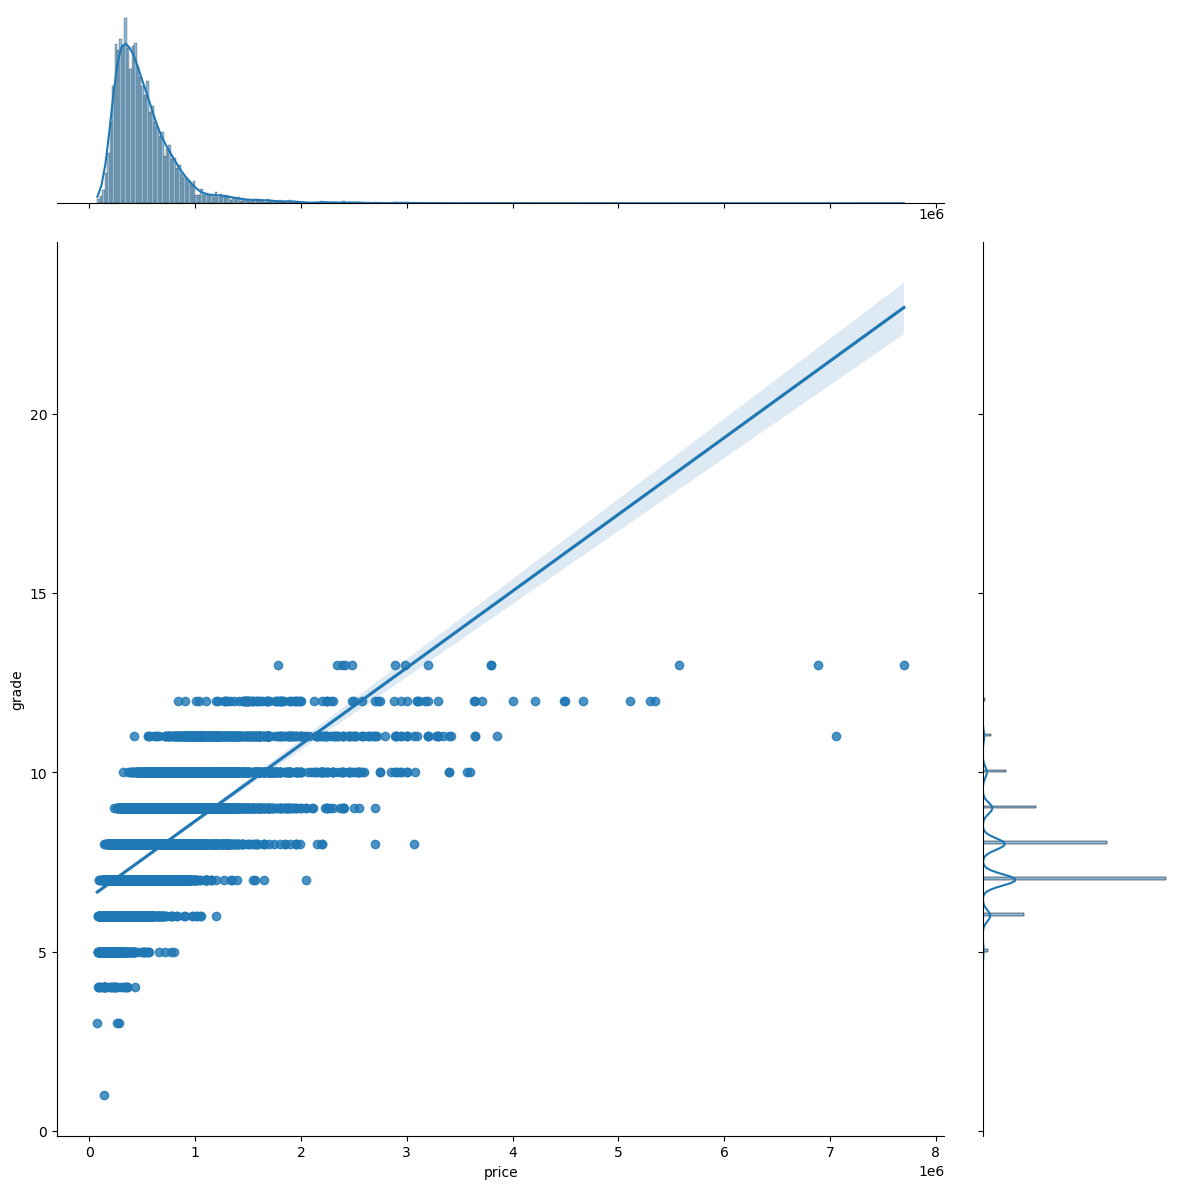

In [31]:
sns.jointplot(x = df['price'], y = df['grade'], kind = 'reg', height=12, ratio=4);


_Вывод:_
чем выше качество конструкции и дизайна дома, тем выше его цена.

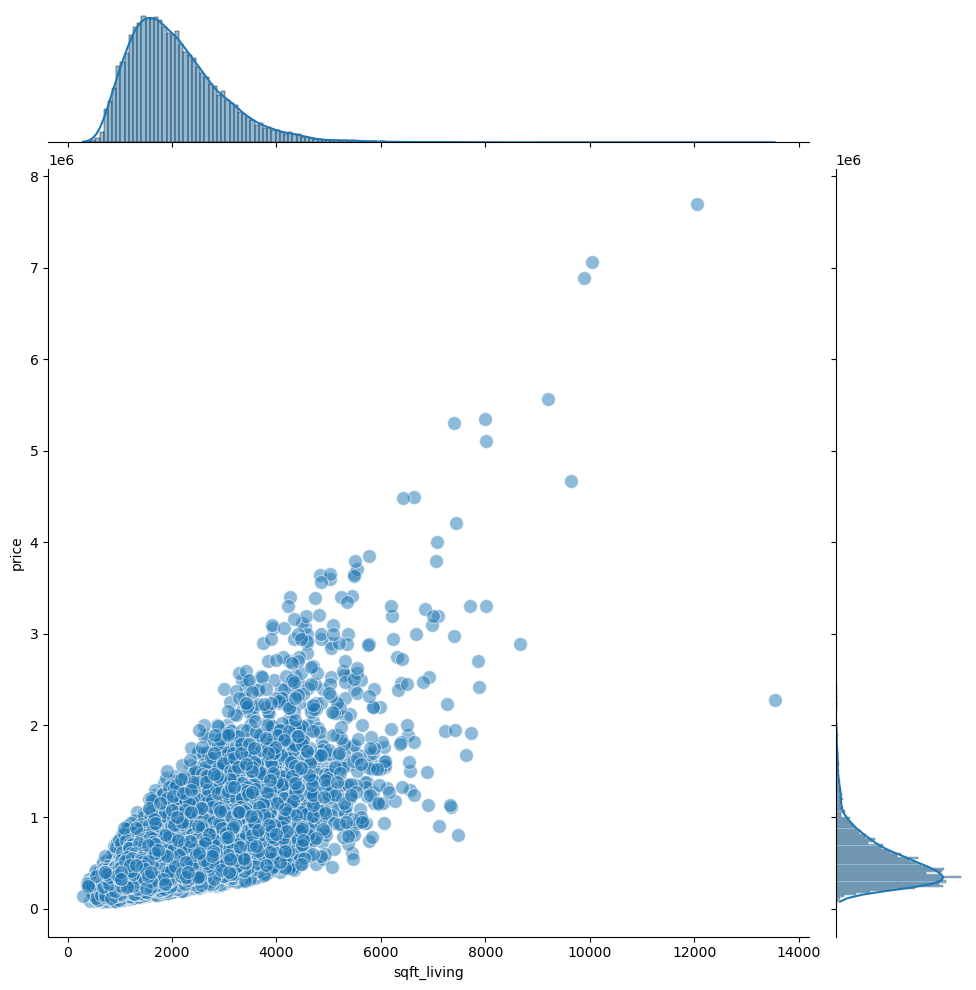

In [26]:
g = sns.JointGrid(data=df, x="sqft_living", y="price",height=10)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True);

_Вывод:_
чем больше жилая площадь, тем выше цена дома

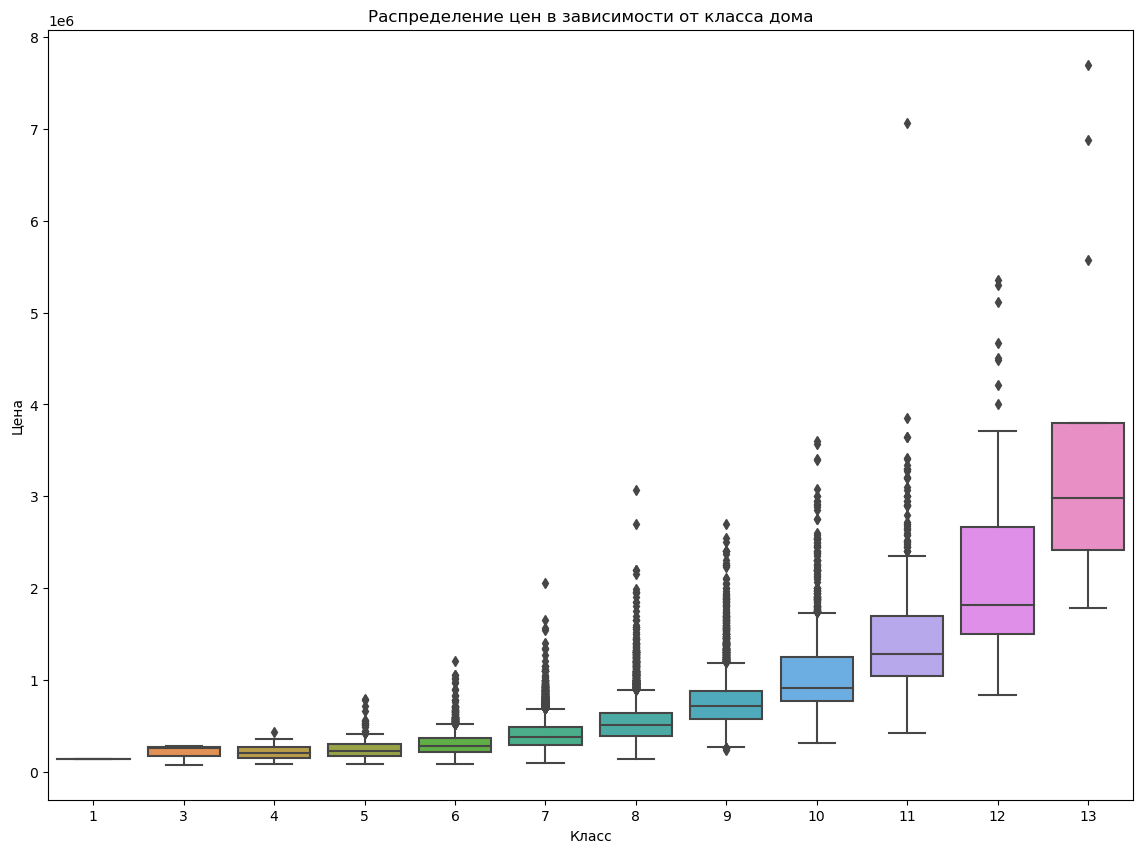

In [27]:
plt.figure(figsize=(14, 10))

sns.boxplot(x=df['grade'], y=df['price'], whis=1.0)

plt.xlabel('Класс')
plt.ylabel('Цена')
plt.title('Распределение цен в зависимости от класса дома');

_Вывод:_

- с увеличением класса жилья (grade - качество конструкции и дизайна дома) увеличивается и размах по цене;
- для домов с 7-11 классом наблюдается максимальное количество выбросов.

In [29]:
data = df.groupby('yr_built')['price'].mean().reset_index()
data

yr_built          price
0        1900  581387.206897
1        1901  556935.931034
2        1902  673007.407407
3        1903  480958.195652
4        1904  583756.644444
..        ...            ...
111      2011  544522.000000
112      2012  527447.335294
113      2013  678545.452736
114      2014  683681.754919
115      2015  759785.157895

[116 rows x 2 columns]

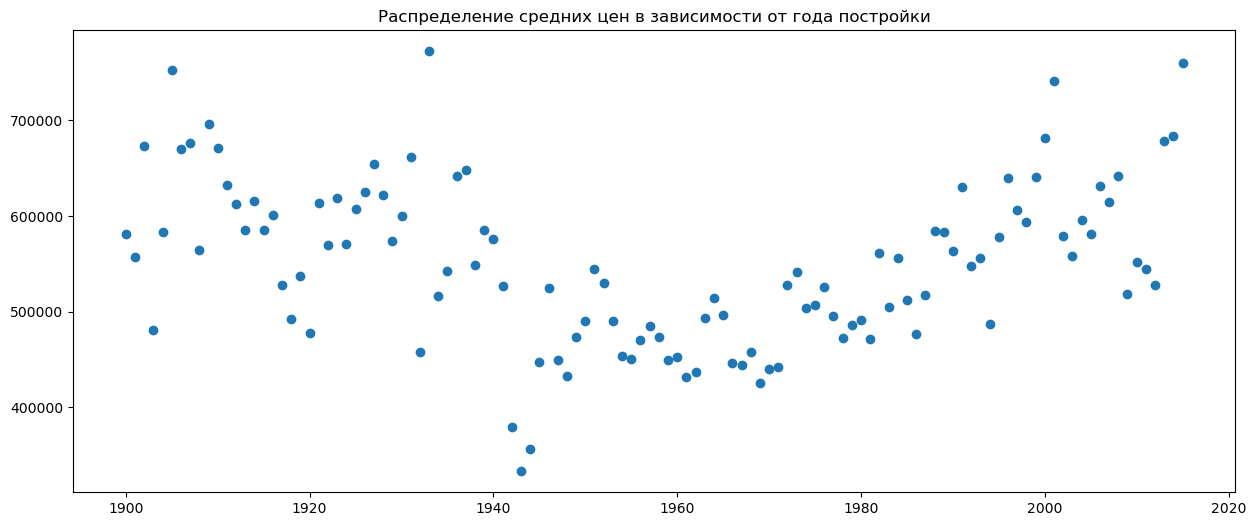

In [30]:
plt.figure(figsize=(15, 6))
plt.scatter(data['yr_built'], data['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

Вывод:

- распределение цены в зависимости от года постройки имеет U-образную форму;
- цена на дома, построенные с 1900-х до 1960-х, постепенно опускалась;
- при этом цена на дома, построенные в 1940-х годах, принимает неожиданно низкие значения;
- цена на дома, построенные с 1960-х годов, вновь начинает расти;
- для домов, построенных в 2020-х годах, цена почти такая же, как и для домов, построенных в 1900-х годах;
- можно предположить, что старые дома, которые стоят больше 1 века, имеют особую историческую значимость и поэтому их цена находится на одном уровне с ценами домов, построенных в 2000-х годах.

### Общий вывод:

На цену недвижимости влияют больше всего следующие параметры (в порядку убывания значимости):
- жилая площадь;
- качество конструкции и дизайна дома (класс);
- историческую ценность;
размеры 15 соседних домов (Кв. метры жилой площади у 15 соседей).